# MSN 514 - Chapter 07: Metropolis

## Ising model

### Finite 1D

9


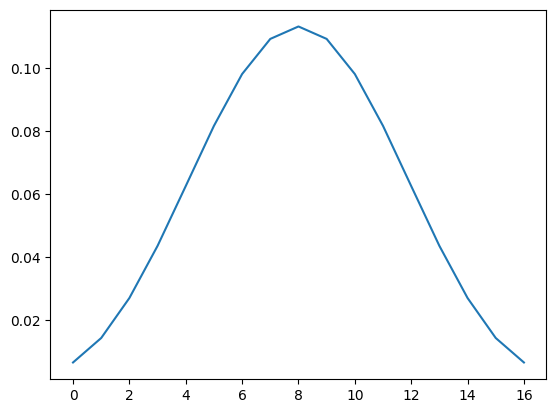

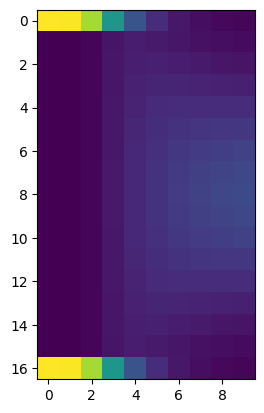

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

Nk = 10
kbT = np.linspace(0.2, 2, Nk)
J = 1
N = 16
p = np.zeros((N+1, Nk))
for nk in range(Nk):
    for r in range(2**N):
        # Creating binary and then turning it into a spin configuration
        s = np.fromiter(bin(r)[2:].zfill(N), dtype=int)*2-1
        E = -J*np.sum(s*np.roll(s,1,axis=0))
        m = np.sum(s)
        p[(m+N)//2,nk] += np.exp(-E/kbT[nk])
    p[:,nk] = p[:,nk]/np.sum(p[:,nk])
    clear_output(wait=True)
    print(nk)
    plt.plot(p[:,nk])
    plt.show()

plt.imshow(p)
plt.show()

### Finite 2D

9


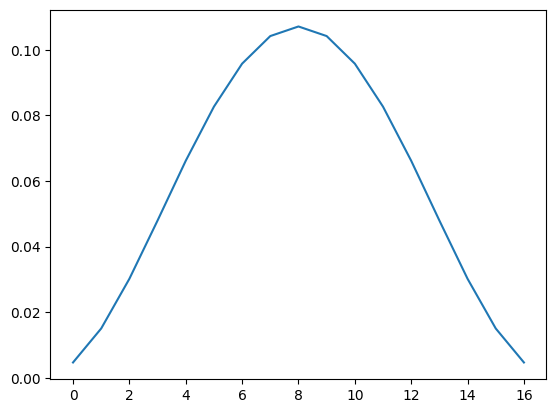

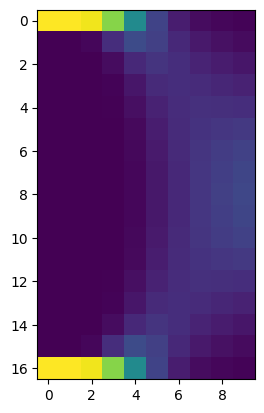

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

Nk = 10
kbT = np.linspace(0.1, 5, Nk)
J = 1
L = 4
N = L**2
p = np.zeros((N+1, Nk))
for nk in range(Nk):
    for r in range(2**N):
        s = (np.fromiter(bin(r)[2:].zfill(N), dtype=int)*2-1).reshape(L,L)
        E = -J*np.sum(s*np.roll(s,1,axis=0) + s*np.roll(s,1,axis=1))
        m = np.sum(s)
        p[(m+N)//2,nk] += np.exp(-E/kbT[nk])
    p[:,nk] = p[:,nk]/np.sum(p[:,nk])
    clear_output(wait=True)
    print(nk)
    plt.plot(p[:,nk])
    plt.show()

plt.imshow(p)
plt.show()

## Bethe Approximation

https://en.wikipedia.org/wiki/Spontaneous_symmetry_breaking

https://en.wikipedia.org/wiki/Catastrophe_theory

https://en.wikipedia.org/wiki/The_Swallow%27s_Tail

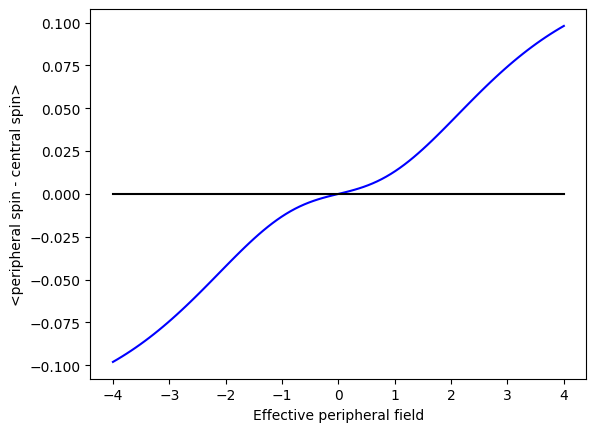

In [52]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
kbT = 3
J = 1
B = 0.0
h = np.linspace(-4, 4, N)
es0 = np.zeros(N)
es1 = np.zeros(N)
Z = np.zeros(N)

for s0 in [-1, 1]:
    for s1 in [-1, 1]:
        for s2 in [-1, 1]:
            for s3 in [-1, 1]:
                for s4 in [-1, 1]:
                    H = -J * s0 * (s1 + s2 + s3 + s4) \
                        - h * (s1 + s2 + s3 + s4) \
                        - B * (s0 + s1 + s2 + s3 + s4)
                    es0 += s0 * np.exp(-H / kbT)
                    es1 += s1 * np.exp(-H / kbT)
                    Z += np.exp(-H / kbT)

plt.plot(h, (es1 - es0) / Z, 'b')
plt.plot([-4, 4], [0, 0], color='k')
plt.xlabel('Effective peripheral field')
plt.ylabel('<peripheral spin - central spin>')
plt.show()


### First-order Bethe Approximation

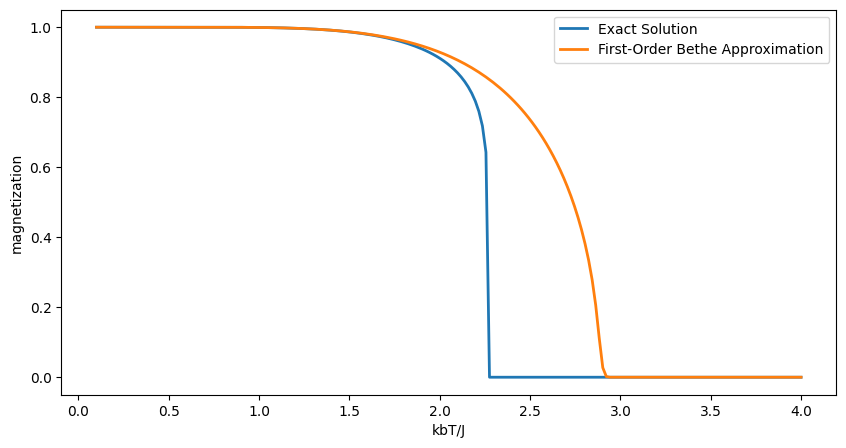

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def find_root(h, kbT, J, B):
    T = 100
    for t in range(T):
        es0 = 0
        es1 = 0
        Z = 0
        for s0 in [-1, 1]:
            for s1 in [-1, 1]:
                for s2 in [-1, 1]:
                    for s3 in [-1, 1]:
                        for s4 in [-1, 1]:
                            H = -J*s0*(s1 + s2 + s3 + s4) \
                                - h*(s1 + s2 + s3 + s4) \
                                - B*(s0 + s1 + s2 + s3 + s4)
                            es0 += s0 * np.exp(-H/kbT)
                            es1 += s1 * np.exp(-H/kbT)
                            Z += np.exp(-H/kbT)
        f = (es1 - es0) / Z
        h = h - 10 * f
    m = (es1 + es0) / 2 / Z
    return h, m

J = 1
B = 0.0
N = 200
kbT = np.linspace(0.1, 4, N)
m = np.zeros(N)
h = 3
for n in range(N):
    h, m[n] = find_root(h, kbT[n], J, B)


Tc = 2/np.log(1+np.sqrt(2))
m_exact = np.zeros_like(kbT)
m_exact[np.where(kbT < Tc)] = \
    (1 - np.sinh(2*J/kbT[np.where(kbT < Tc)])**-4)**(1/8)

plt.figure(figsize=(10, 5))
plt.plot(kbT, m_exact, linewidth=2, label='Exact Solution')
plt.plot(kbT, m, linewidth=2, label='First-Order Bethe Approximation')
plt.xlabel('kbT/J')
plt.ylabel('magnetization')
plt.legend()
plt.show()

kbT1 = kbT
m1 = m

### Second-order Bethe Approximation

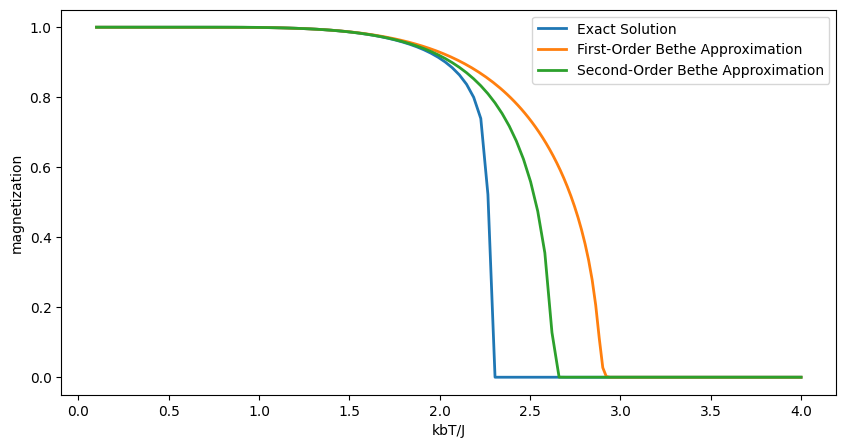

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def find_root(h1, h2, kbT, J, B):
    T = 100
    for t in range(T):
        es0 = 0
        es1 = 0
        es5 = 0
        Z = 0
        for s0 in [-1, 1]:
            for s1 in [-1, 1]:
                for s2 in [-1, 1]:
                    for s3 in [-1, 1]:
                        for s4 in [-1, 1]:
                            for s5 in [-1, 1]:
                                for s6 in [-1, 1]:
                                    for s7 in [-1, 1]:
                                        for s8 in [-1, 1]:
                                            H = -J*s0*(s1 + s2 + s3 + s4) \
                                                - J*s5*(s1 + s2) \
                                                - J*s6*(s2 + s3) \
                                                - J*s7*(s3 + s4) \
                                                - J*s8*(s4 + s1) \
                                                - h1*(s1 + s2 + s3 + s4) \
                                                - h2*(s5 + s6 + s7 + s8) \
                                                - B*(s0 + s1 + s2 + s3 + s4 + s5 + s6 + s7 + s8)
                                            es0 += s0 * np.exp(-H/kbT)
                                            es1 += s1 * np.exp(-H/kbT)
                                            es5 += s5 * np.exp(-H/kbT)
                                            Z += np.exp(-H/kbT)
        f1 = (es1 - es0) / Z
        f2 = (es5 - es0) / Z
        h1 = h1 - 10 * f1
        h2 = h2 - 10 * f2
    m = (es0 + es1 + es5) / 3 / Z
    return h1, h2, m

J = 1
B = 0.0
N = 100
kbT = np.linspace(0.1, 4, N)
m = np.zeros(N)
h1 = 3
h2 = 3

for n in range(N):
    h1, h2, m[n] = find_root(h1, h2, kbT[n], J, B)


Tc = 2/np.log(1+np.sqrt(2))
m_exact = np.zeros_like(kbT)
m_exact[np.where(kbT < Tc)] = \
    (1 - np.sinh(2*J/kbT[np.where(kbT < Tc)])**-4)**(1/8)

plt.figure(figsize=(10, 5))
plt.plot(kbT, m_exact, linewidth=2, label='Exact Solution')
plt.plot(kbT1, m1, linewidth=2, label='First-Order Bethe Approximation')
plt.plot(kbT, m, linewidth=2, label='Second-Order Bethe Approximation')
plt.xlabel('kbT/J')
plt.ylabel('magnetization')
plt.legend()
plt.show()

## Metropolis algorithm

### Basic version with magnetic field

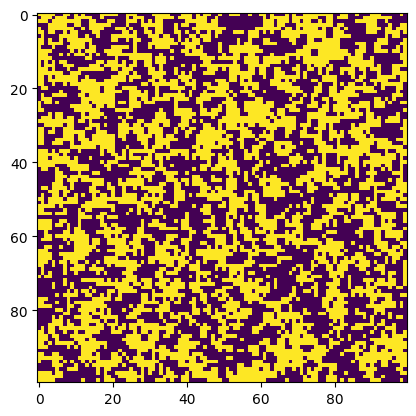

KeyboardInterrupt: 

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

N = 100

s = np.random.randint(2, size=(N, N))*2-1
# s = np.ones((N, N))

J = 1
kbT = 4
B = 0.0

for i in range(1000):
    random_sites = np.random.randint(N, size=(N**2, 2))
    random_dice = np.random.rand(N**2)
    for site, dice in zip(random_sites, random_dice):
        x, y = site
        dE = 2*J*s[x,y]*(s[(x+1)%N,y] + s[(x-1)%N,y] + s[x,(y+1)%N] + s[x,(y-1)%N]) + 2*B*s[x,y]
        if dE < 0 or dice < np.exp(-dE/kbT):
            s[x,y] *= -1
    clear_output(wait=True)
    plt.imshow(s, cmap='viridis', vmin=-1, vmax=1)
    plt.show()

### Faster version without magnetic field

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

N = 100

s = np.random.randint(2, size=(N, N))*2-1
# plt.imshow(s)

J = 1
kbT = 1
prob = np.array([1.0, 1.0, 1.0, np.exp(-4*J/kbT), np.exp(-8*J/kbT)])

for i in range(1000):
    x_center = np.random.randint(N, size=N**2)
    y_center = np.random.randint(N, size=N**2)
    x_left = (x_center - 1) % N
    x_right = (x_center + 1) % N
    y_up = (y_center + 1) % N
    y_down = (y_center - 1) % N
    random_dice = np.random.rand(N**2)
    for xc, yc, xl, xr, yu, yd, dice in zip(x_center, y_center, x_left, x_right, y_up, y_down, random_dice):
        nprob = int(s[xc,yc]*(s[xl,yc] + s[xr,yc] + s[xc,yu] + s[xc,yd])/2 + 2)
        if dice < prob[nprob]:
            s[xc,yc] *= -1
    # clear_output(wait=True)
    # plt.imshow(s)
    # plt.show()

### Comparison with theory

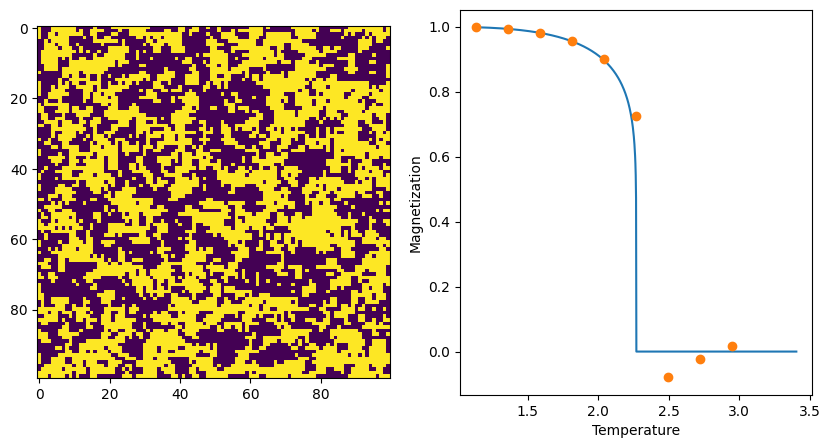

Temperature: 2.9499409084769286 Magnetization: 0.01734399999999999
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/b1/62t8n8xs4_9cd_qh6r_g0bmw0000gn/T/ipykernel_5283/3224027503.py", line 42, in <module>
    s, _ = metropolis_step(s, J, kbT)
  File "/var/folders/b1/62t8n8xs4_9cd_qh6r_g0bmw0000gn/T/ipykernel_5283/3224027503.py", line -1, in metropolis_step
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 1997, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/ultratb.py", line 1112, in structured_traceback
    return FormattedTB.struc

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

def metropolis_step(s, J, kbT):
    mag = np.sum(s)
    prob = np.array([1.0, 1.0, 1.0, np.exp(-4*J/kbT), np.exp(-8*J/kbT)])
    x_center = np.random.randint(N, size=N**2)
    y_center = np.random.randint(N, size=N**2)
    x_left = (x_center - 1) % N
    x_right = (x_center + 1) % N
    y_up = (y_center + 1) % N
    y_down = (y_center - 1) % N
    random_dice = np.random.rand(N**2)
    for xc, yc, xl, xr, yu, yd, dice in zip(x_center, y_center, x_left, x_right, y_up, y_down, random_dice):
        nprob = int(s[xc,yc]*(s[xl,yc] + s[xr,yc] + s[xc,yu] + s[xc,yd])/2 + 2)
        if dice < prob[nprob]:
            s[xc,yc] *= -1
            mag += 2*s[xc,yc]
    return s, mag/N**2


N = 100
N_range = 11
N_thermalization = 400
N_measurements = 100
J = 1

Tc = 2/np.log(1+np.sqrt(2))
kbT_range = np.linspace(0.5*Tc, 1.5*Tc, N_range)

kbT_exact = np.linspace(0.5*Tc, 1.5*Tc, 1000)
magnetization_exact = np.zeros_like(kbT_exact)
magnetization_exact[np.where(kbT_exact < Tc)] = \
    (1 - np.sinh(2*J/kbT_exact[np.where(kbT_exact < Tc)])**-4)**(1/8)

s = np.ones((N, N))
magnetization = np.zeros(N_range)
for n in range(N_range):
    kbT = kbT_range[n]
    for i in range(N_thermalization):
        s, _ = metropolis_step(s, J, kbT)
    for i in range(N_measurements):
        s, mag = metropolis_step(s, J, kbT)
        magnetization[n] += mag
    magnetization[n] /= N_measurements
    clear_output(wait=True)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(s)
    plt.subplot(1, 2, 2)
    plt.plot(kbT_exact, magnetization_exact)
    plt.plot(kbT_range[:n+1], magnetization[:n+1], 'o')
    plt.xlabel('Temperature')
    plt.ylabel('Magnetization')
    plt.show()
    print(f'Temperature: {kbT}', f'Magnetization: {magnetization[n]}')

## Simulated annealing of traveling salesman

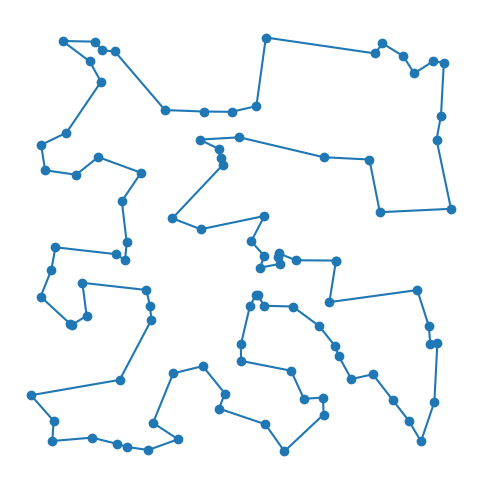

In [58]:
import numpy as np

N = 100
T = 1000000
kbT = 10

# locations = np.random.rand(N, 2)

distances = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        distances[i,j] = np.sqrt(np.sum((locations[i]-locations[j])**2))

route = np.random.permutation(N)
route = np.concatenate((route, [route[0]]))

dice = np.random.rand(T)
r2, r3 = np.sort(np.random.randint(1, N, size=(T, 2)), axis=1).T
r1 = r2 - 1
r4 = r3 + 1

for t in range(T):
    kbT *= 0.99999

    dE = distances[route[r1[t]], route[r3[t]]] + distances[route[r2[t]], route[r4[t]]] - \
         distances[route[r1[t]], route[r2[t]]] - distances[route[r3[t]], route[r4[t]]]

    if dE < 0 or dice[t] < np.exp(-dE/kbT):
        route[r2[t]:r3[t]+1] = np.flip(route[r2[t]:r3[t]+1])
    
    if t % 10000 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(6, 6))
        plt.plot(locations[route,0], locations[route,1], 'o-')
        plt.axis('square')
        plt.axis('off')
        plt.show()